In [22]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [23]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [25]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

<AxesSubplot:>

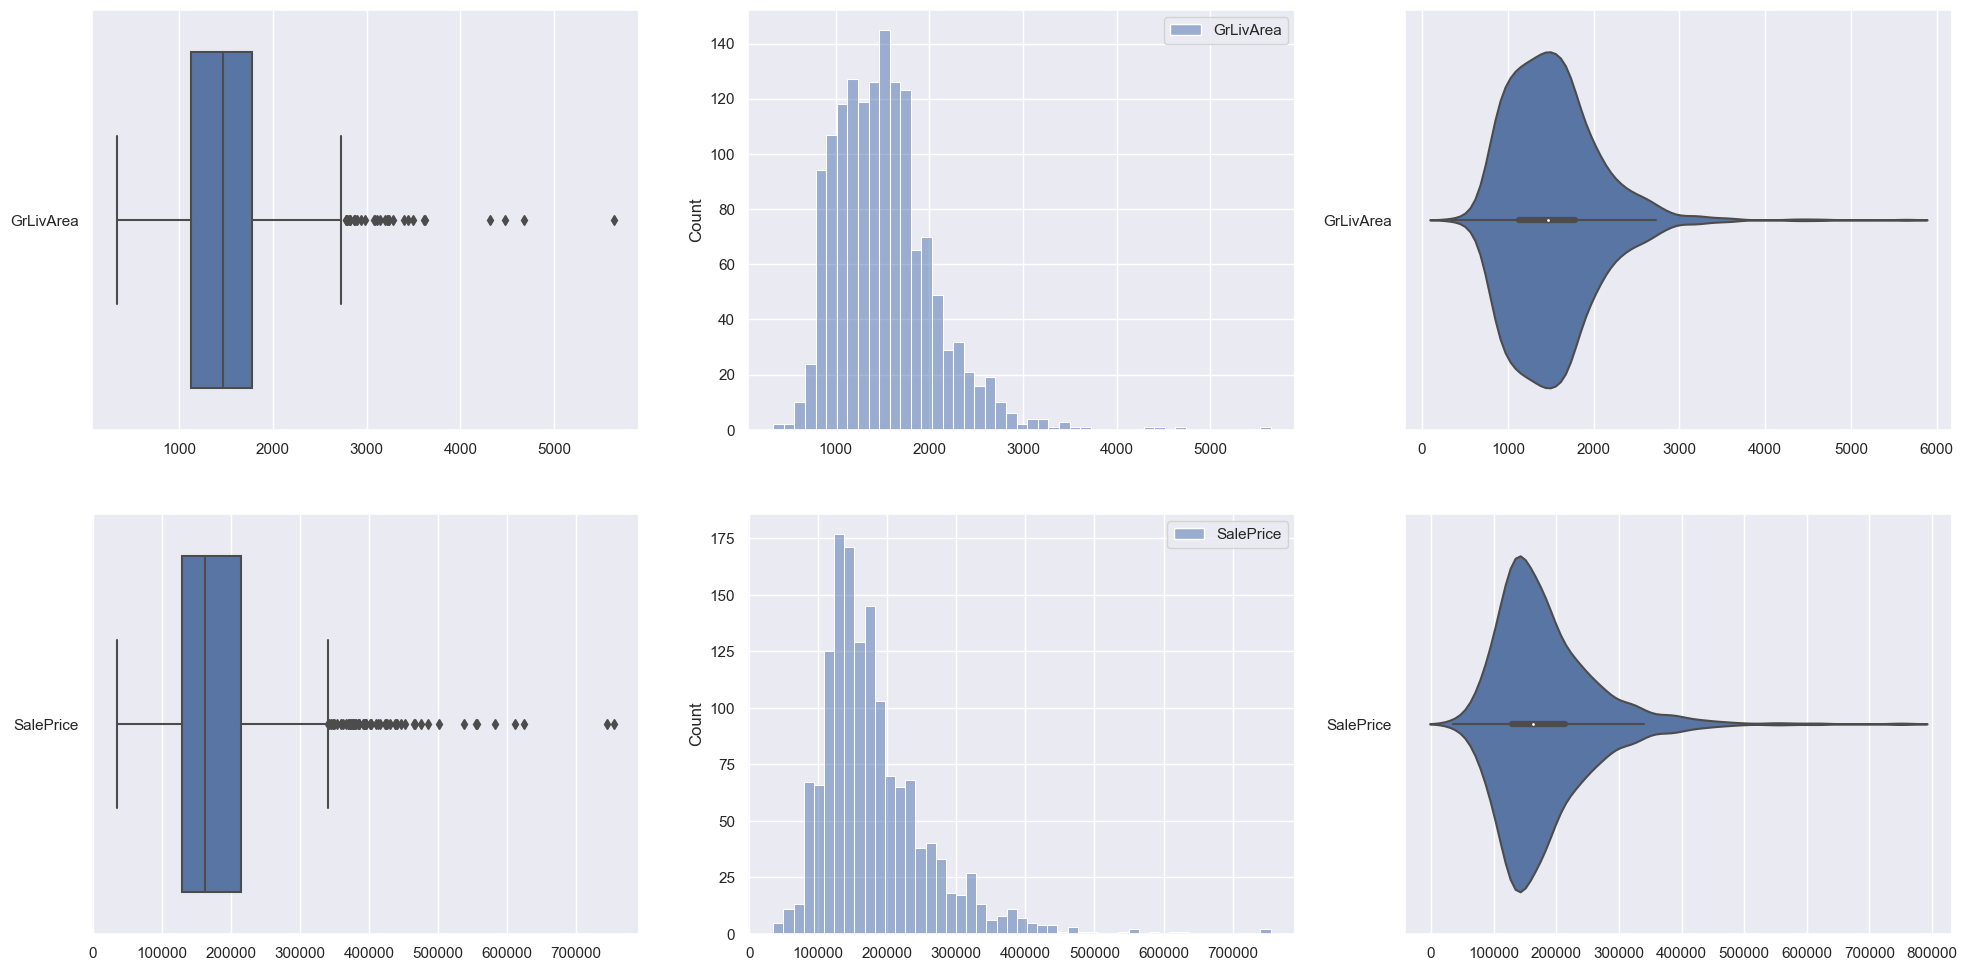

In [26]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize = (24, 12))

# Plot the basic uni-variate figures for GrLivArea, SalePrice
sb.boxplot(data = houseGrLivArea, orient = "h", ax = axes[0,0])
sb.histplot(data = houseGrLivArea, ax = axes[0,1])
sb.violinplot(data = houseGrLivArea, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for GrLivArea, SalePrice
sb.boxplot(data = houseSalePrice, orient = "h", ax = axes[1,0])
sb.histplot(data = houseSalePrice, ax = axes[1,1])
sb.violinplot(data = houseSalePrice, orient = "h", ax = axes[1,2])

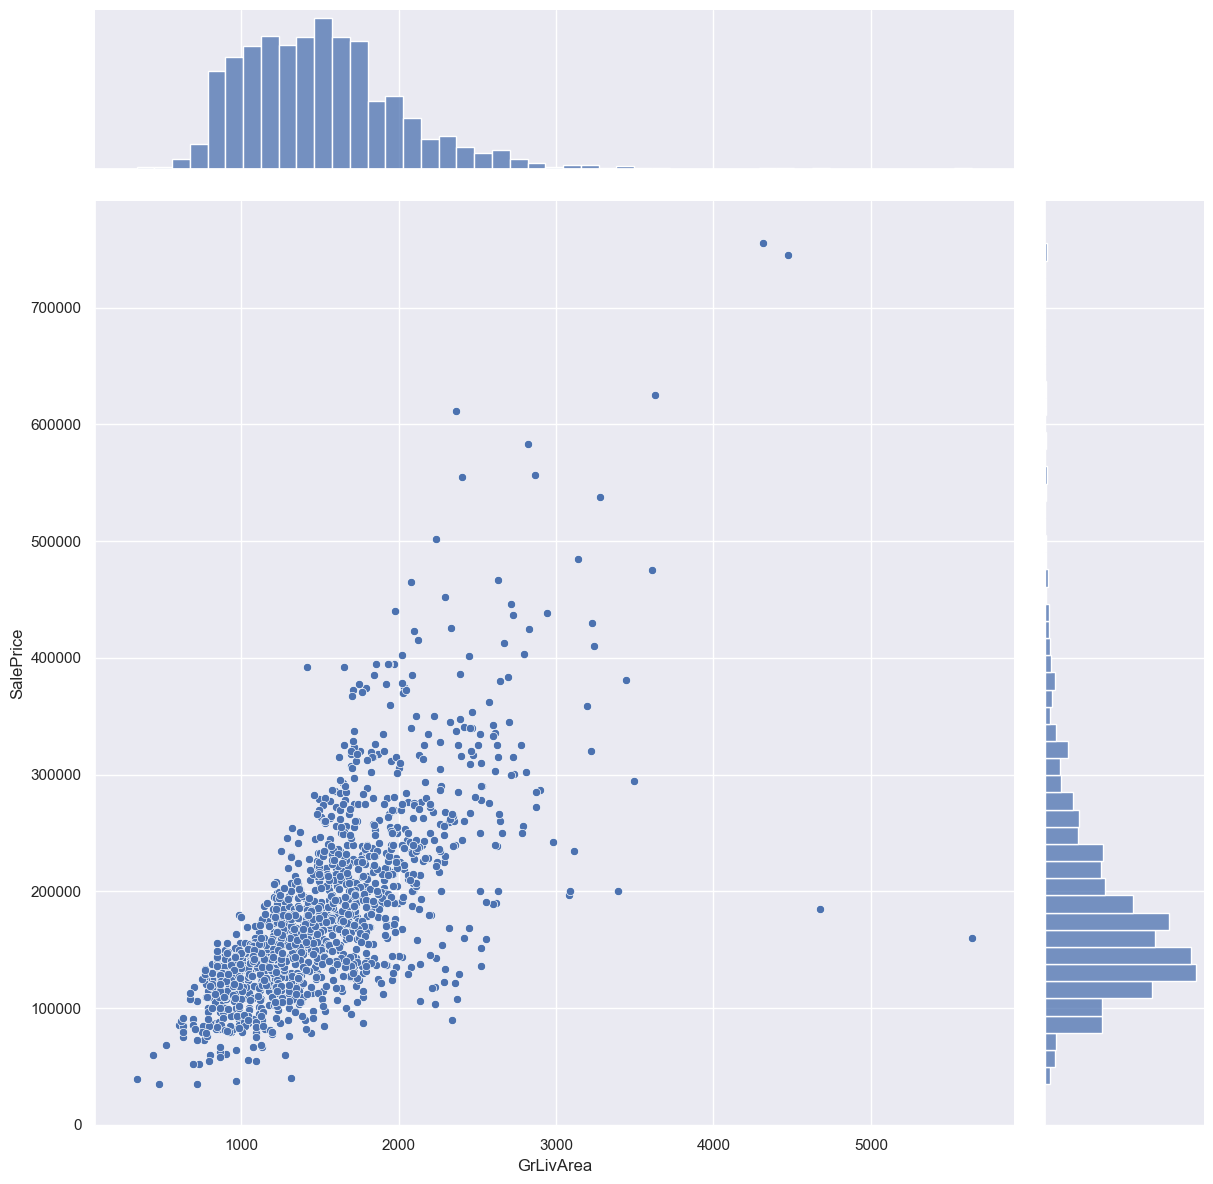

In [27]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([houseGrLivArea, houseSalePrice], axis = 1).reindex(houseGrLivArea.index)

# Jointplot of houseSalePrice againstg houseGrLivArea
sb.jointplot(data = trainDF, x = 'GrLivArea', y = 'SalePrice', height = 12)

<AxesSubplot:>

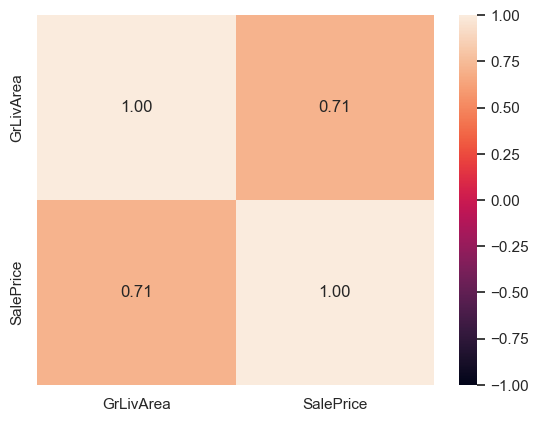

In [28]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f')

#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [29]:
# Import Linear Regression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
linreg = LinearRegression()

In [30]:
# Train Set : FIRST 1100 rows
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])

# Test Set : FIRST 360 rows
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])

# Check the Sample size
print("Train Set: ", houseSalePrice_train.shape, houseGrLivArea_train.shape)
print("Test Set: ", houseSalePrice_test.shape, houseGrLivArea_test.shape)

Train Set:  (1100, 1) (1100, 1)
Test Set:  (360, 1) (360, 1)


Train the Linear Regression model `linreg` using the Train Set.   
Use `hp_train` as *Predictor* and `total_train` as *Response*.

In [31]:
# Train the Linear Regression model
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

You have *trained* the model to fit the following formula.

>  Regression Problem : Total = $a$ $\times$ HP + $b$

Check Intercept ($a$) and Coefficient ($b$) of the regression line.

In [32]:
# Coefficients of the Linear Regression Line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a =', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a = [[113.88950443]]


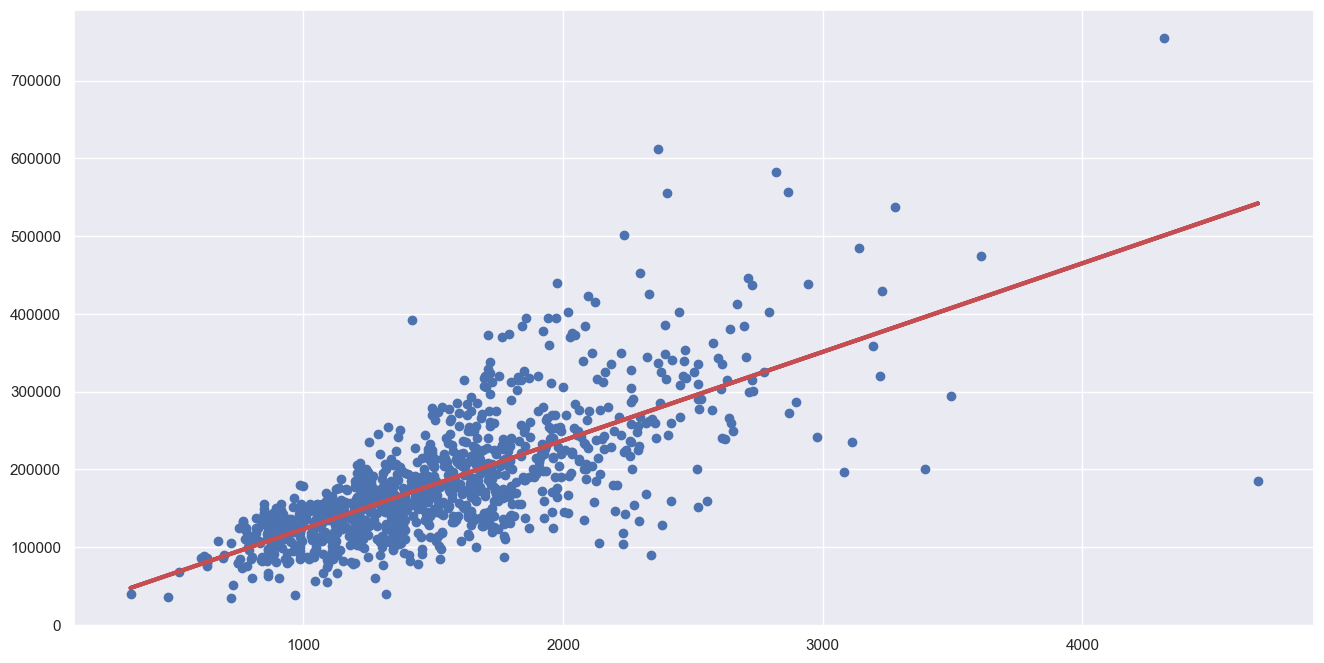

In [33]:
#Formula for regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

#Plot the Linear Regression line
f = plt.figure(figsize = (16,8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

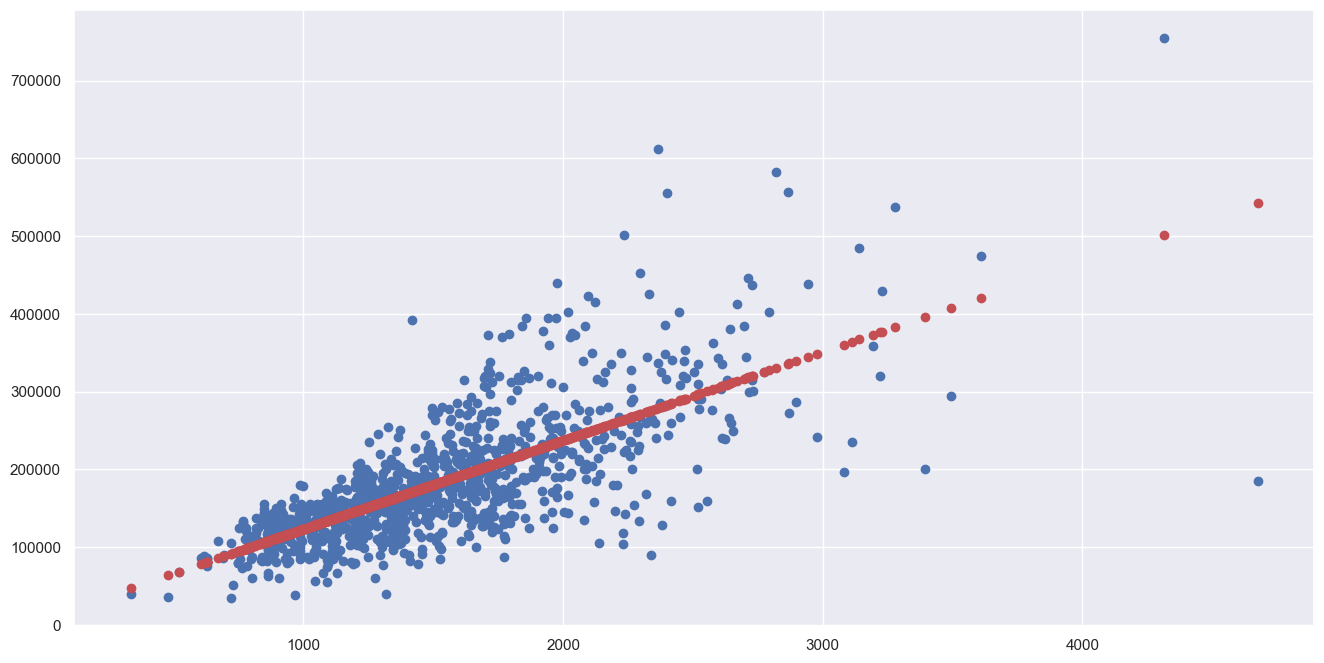

In [36]:
# Predict Sale Price values corresponding to GrLIvArea Values
total_houseSalePrice_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize = (16,8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.scatter(houseGrLivArea_train, total_houseSalePrice_pred, color = 'r')
plt.show()

In [40]:
# Explained Variance (R^2)
print("Explained Variance R^2  \t:", linreg.score(houseGrLivArea_train,houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values '''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_train,total_houseSalePrice_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance R^2  	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771


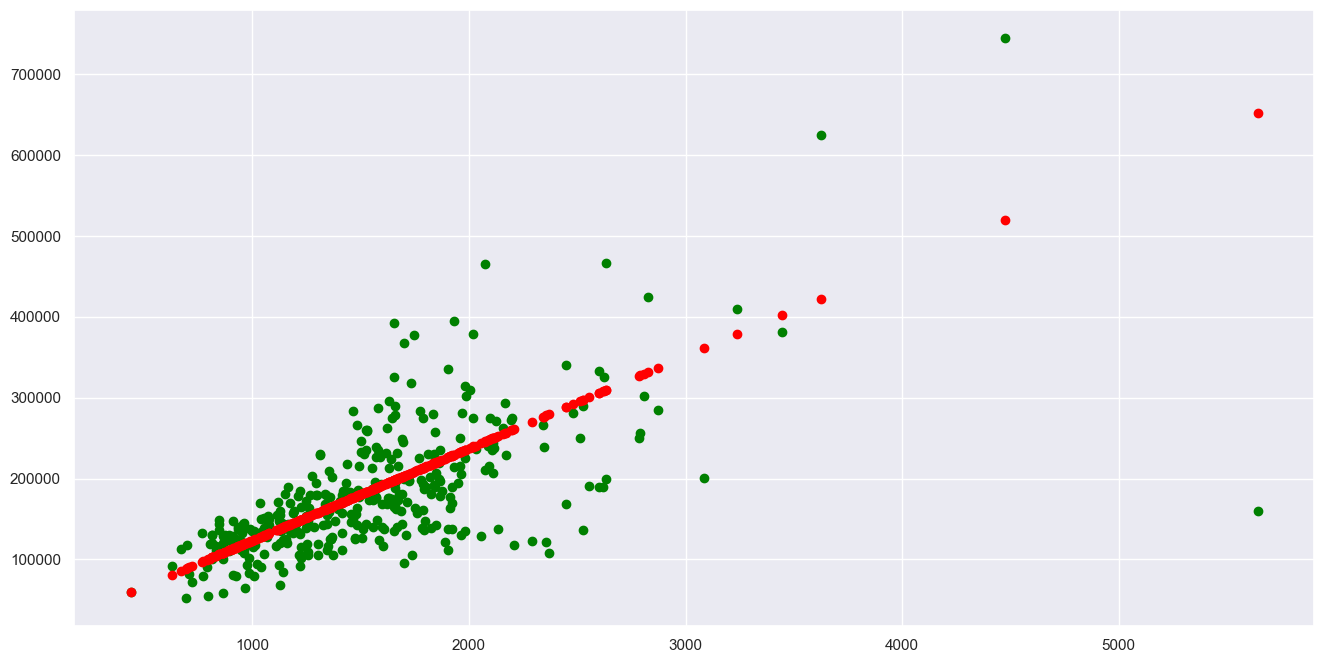

In [39]:
# Predict total values corresponding to GrLivArea Test
total_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize = (16,8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = 'green')
plt.scatter(houseGrLivArea_test, total_test_pred, color = 'red')
plt.show()

In [41]:
# Explained Variance (R^2)
print("Explained Variance R^2  \t:", linreg.score(houseGrLivArea_test,houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values '''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(houseSalePrice_test,total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance R^2  	: 0.40117720006925794
Mean Squared Error (MSE) 	: 3737081522.2960896
Root Mean Squared Error (RMSE) 	: 61131.67364219705
